In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

from src import constants as const
import pickle
from tabGAN import TabGANcf

In [6]:
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
classifier_syn_moon = SVC(probability=True)
x, y = sklearn.datasets.make_moons(n_samples=5000, noise=0.08, random_state=0)
df_syn_moon = pd.DataFrame({"x1": x[:,0], "x2": x[:,1], "dummy": np.random.choice(["1", "0"], size=x.shape[0])})
classifier_syn_moon.fit(X=df_syn_moon[["x1", "x2"]].to_numpy(), y=y)

SVC(probability=True)

In [7]:
def classifier_syn_moon_modified(x):
    if isinstance(x, pd.DataFrame):
        x = x.loc[:, ["x1", "x2"]].to_numpy()
    return classifier_syn_moon.predict_proba(x)[:,1]
path_counterfactual_queries = os.path.join(const.dir.py_objects(), 'counterfactual_queries.pickle')
N_COUNTERFACTUALS = 10

In [8]:
with open(path_counterfactual_queries, 'rb') as handle:
    counterfactual_queries = pickle.load(handle)

[]


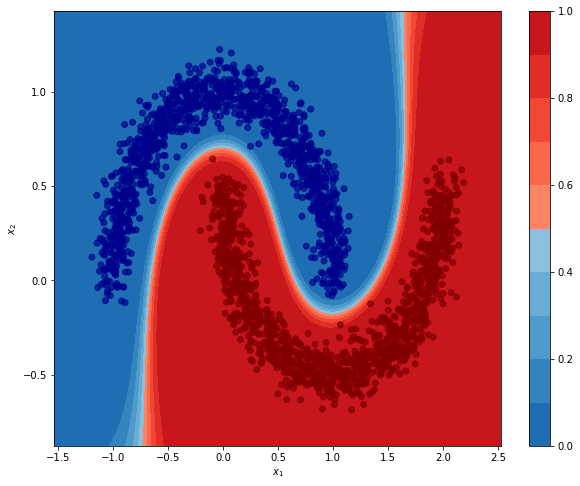

In [9]:
tgcf = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
               activation_function="gelu", only_gen_class=1, query_critic_instance=False,
               jit_compile=False)
tgcf.train(0)
tgcf.plot2D_classifier(["x1", "x2"], add_observations=True, n_observations=2500, observation_opacity=0.7,
                      save_dir=const.dir.images(), save_path="Syn_Moon.pdf", figsize=(10,8))

In [ ]:
tgcf_only_want_class = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
                                classifier_adjusted_wgan_loss_term=True,
               activation_function="gelu", only_want_class=1, query_critic_instance=False,
               jit_compile=False, adam_beta1=0)
tgcf_only_want_class.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

In [64]:
tgcf_only_want_class.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_want_class_run_1"  
)

NameError: name 'tgcf_only_want_class' is not defined

In [ ]:
tgcf_only_want_class.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_want_class_run2.pdf"
)

[]


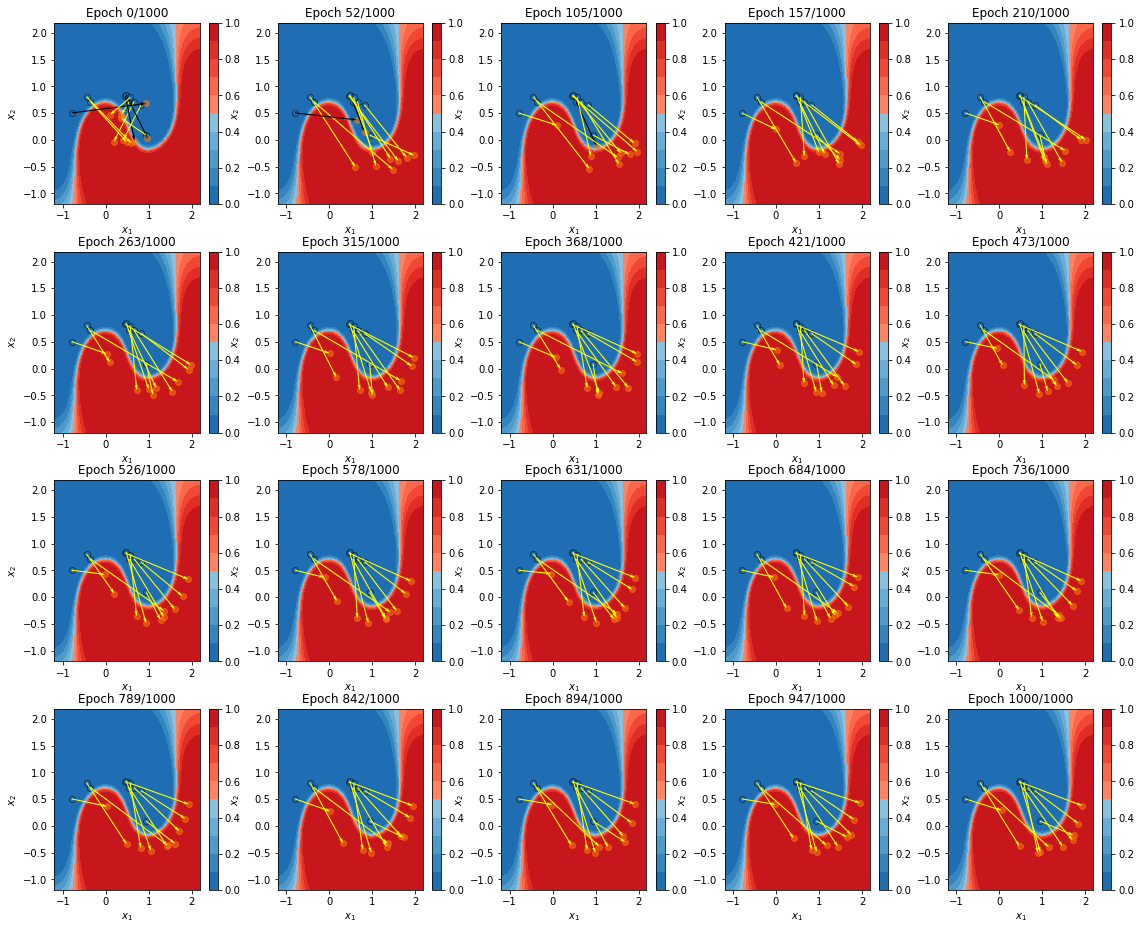

  0%|          | 0/1000 [00:00<?, ?it/s]

()

In [10]:
tgcf_only_gen_class = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
               activation_function="gelu", only_gen_class=1, query_critic_instance=False,
                               adam_beta1=0,
               jit_compile=False, generator_1norm_num_loss_coef=1)
tgcf_only_gen_class.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

In [ ]:
tgcf_only_gen_class.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,n_counterfactuals=5000,
    print_original_observations=True,
    print_counterfactuals=True
)

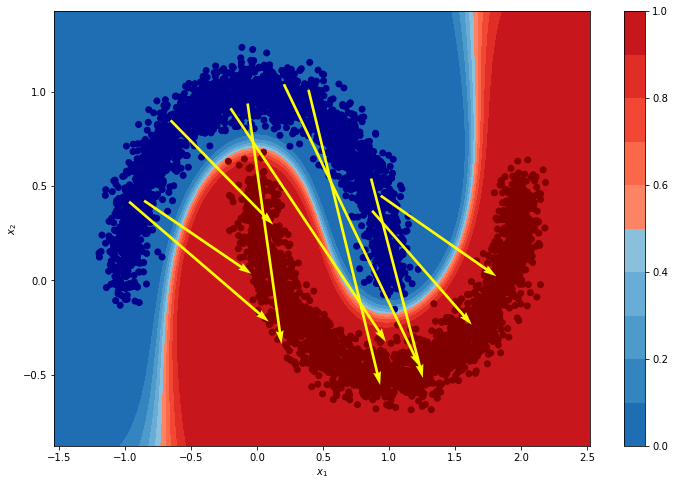

In [72]:
tgcf_only_gen_class.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_run_1.pdf",
#     print_original_observations=True,
#     print_counterfactuals=True
)

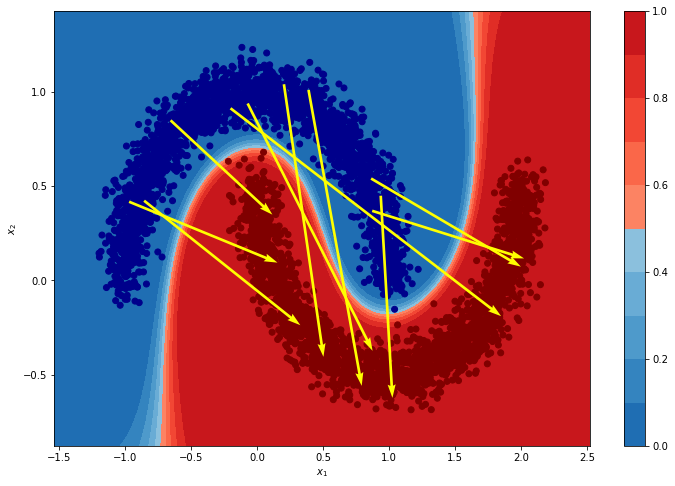

In [49]:
tgcf_only_gen_class.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_run2.pdf"
)

[]


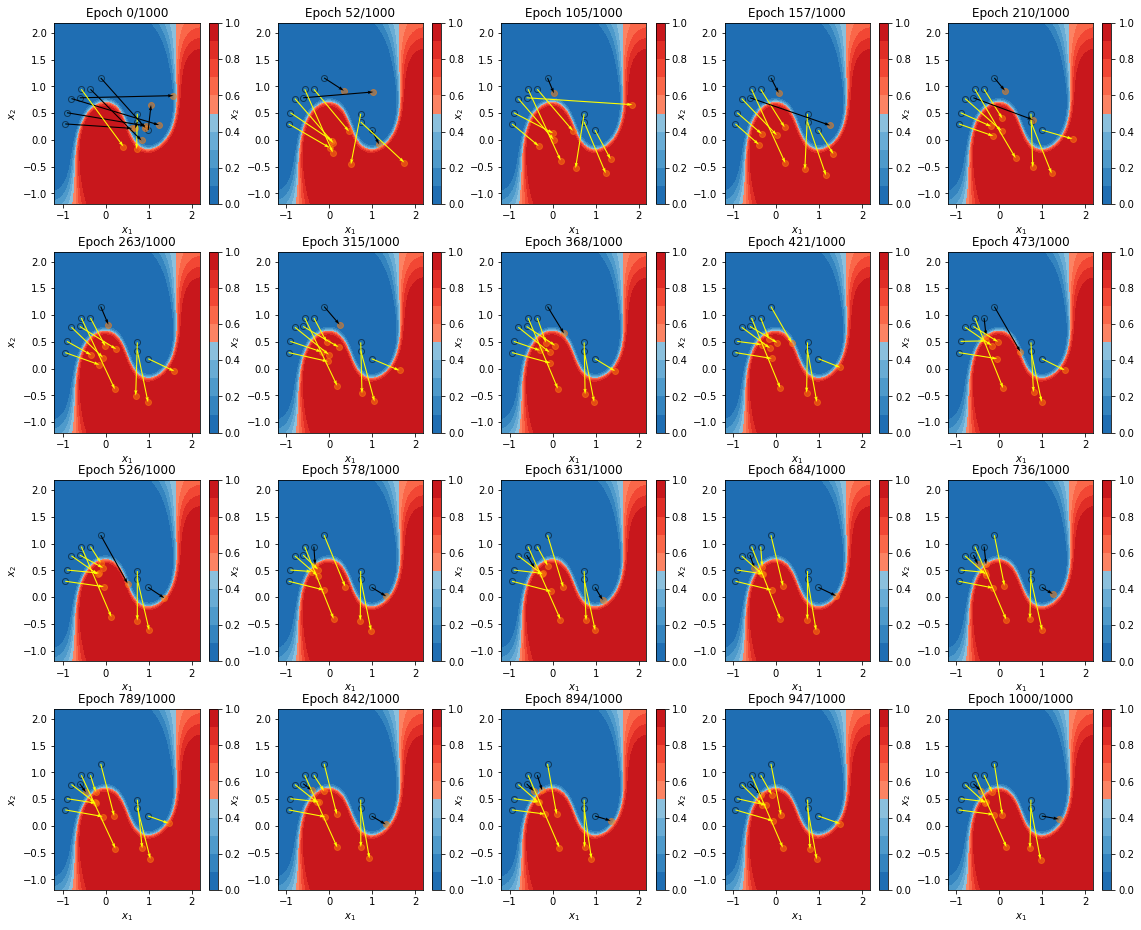

  0%|          | 0/1000 [00:00<?, ?it/s]

()

In [52]:
tgcf_only_gen_class_larger_1norm_num_loss = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
               activation_function="gelu", only_gen_class=1, query_critic_instance=False,
               jit_compile=False, generator_1norm_num_loss_coef=1.5)
tgcf_only_gen_class_larger_1norm_num_loss.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

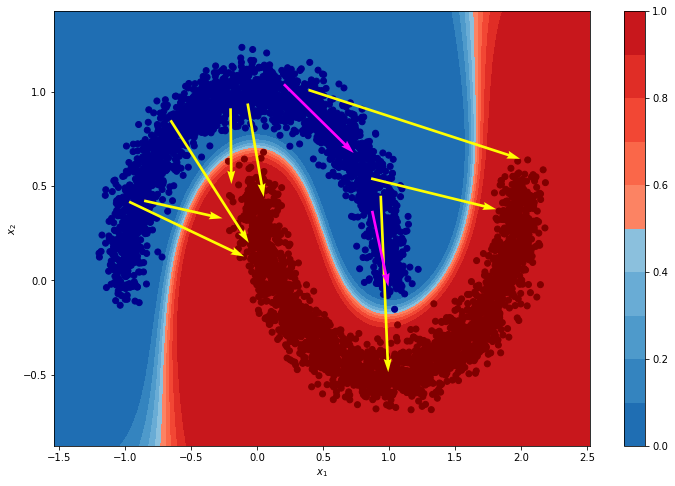

In [90]:
tgcf_only_gen_class_larger_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_larger_1norm_num_loss_run_1.pdf",
)

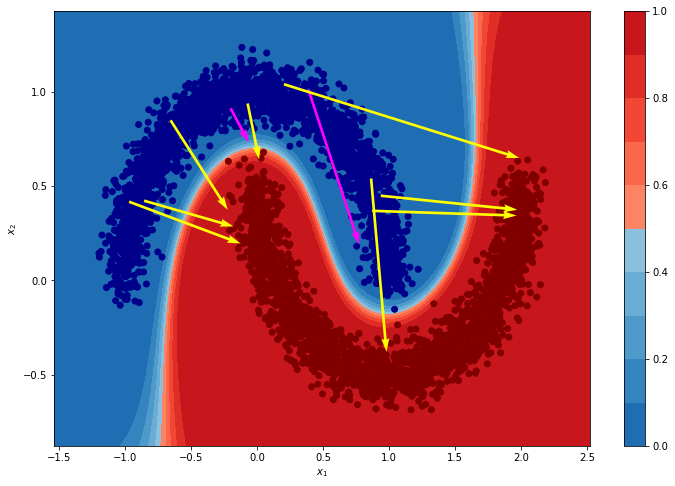

In [77]:
tgcf_only_gen_class_larger_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_larger_1norm_num_loss_run2.pdf"
)

[]


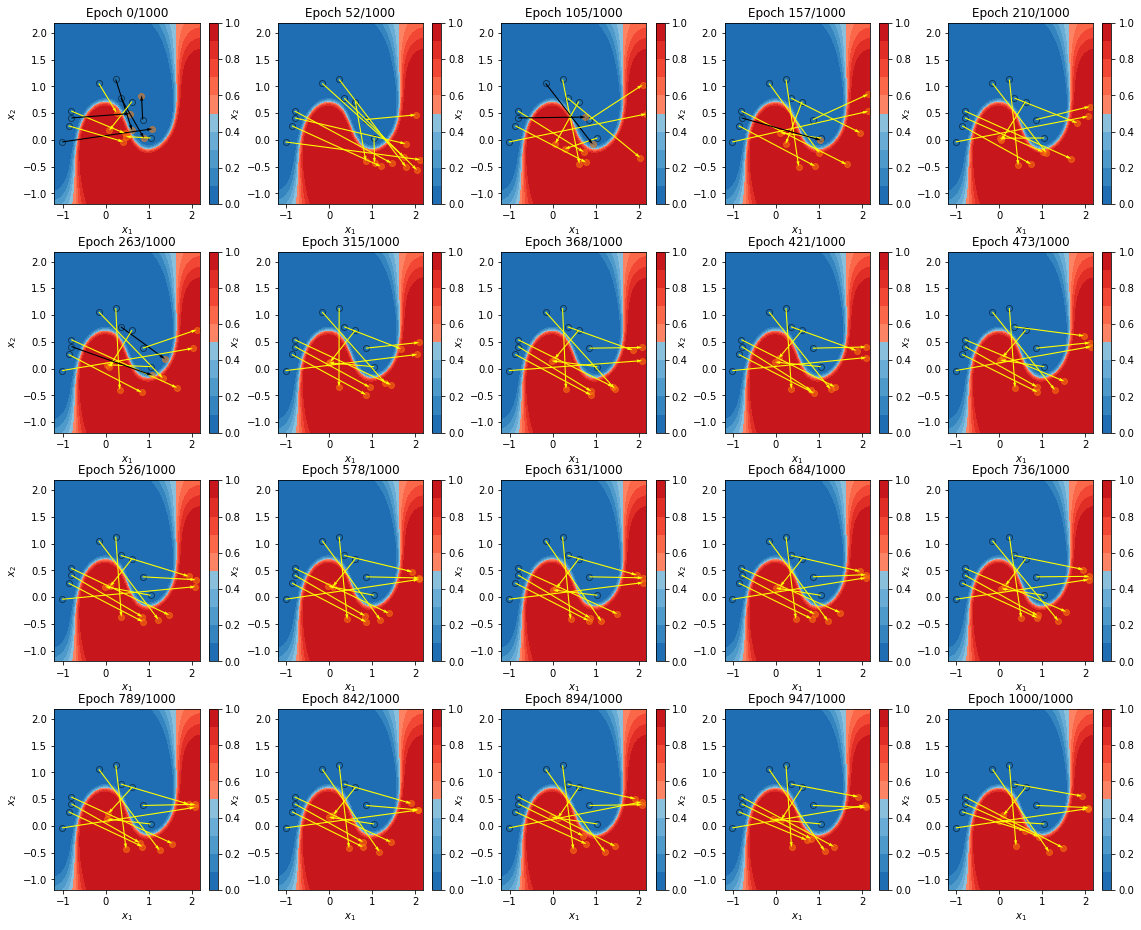

  0%|          | 0/1000 [00:00<?, ?it/s]

()

In [55]:
tgcf_only_gen_class_no_1norm_num_loss = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
               activation_function="gelu", only_gen_class=1, query_critic_instance=False,
               jit_compile=False, generator_1norm_num_loss_coef=0, adam_beta1=0)
tgcf_only_gen_class_no_1norm_num_loss.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

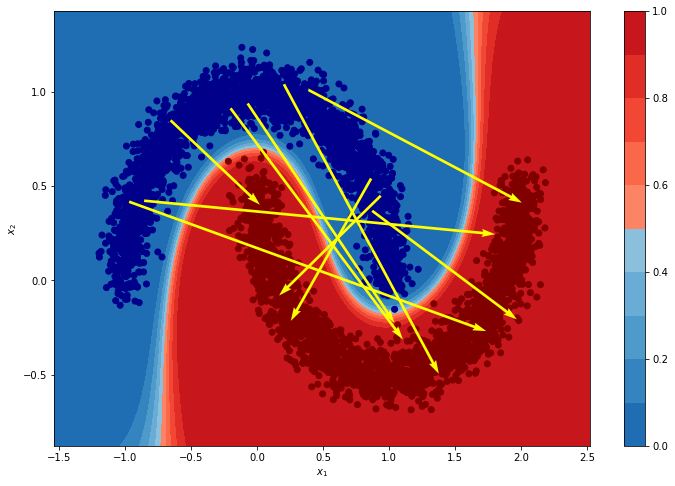

In [92]:
tgcf_only_gen_class_no_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_no_1norm_num_loss_run_1.pdf",
)

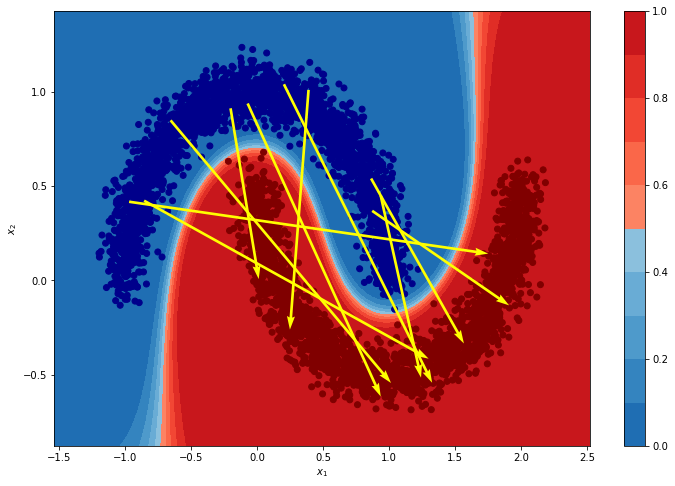

In [57]:
tgcf_only_gen_class_no_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_no_1norm_num_loss_run2.pdf"
)

[]


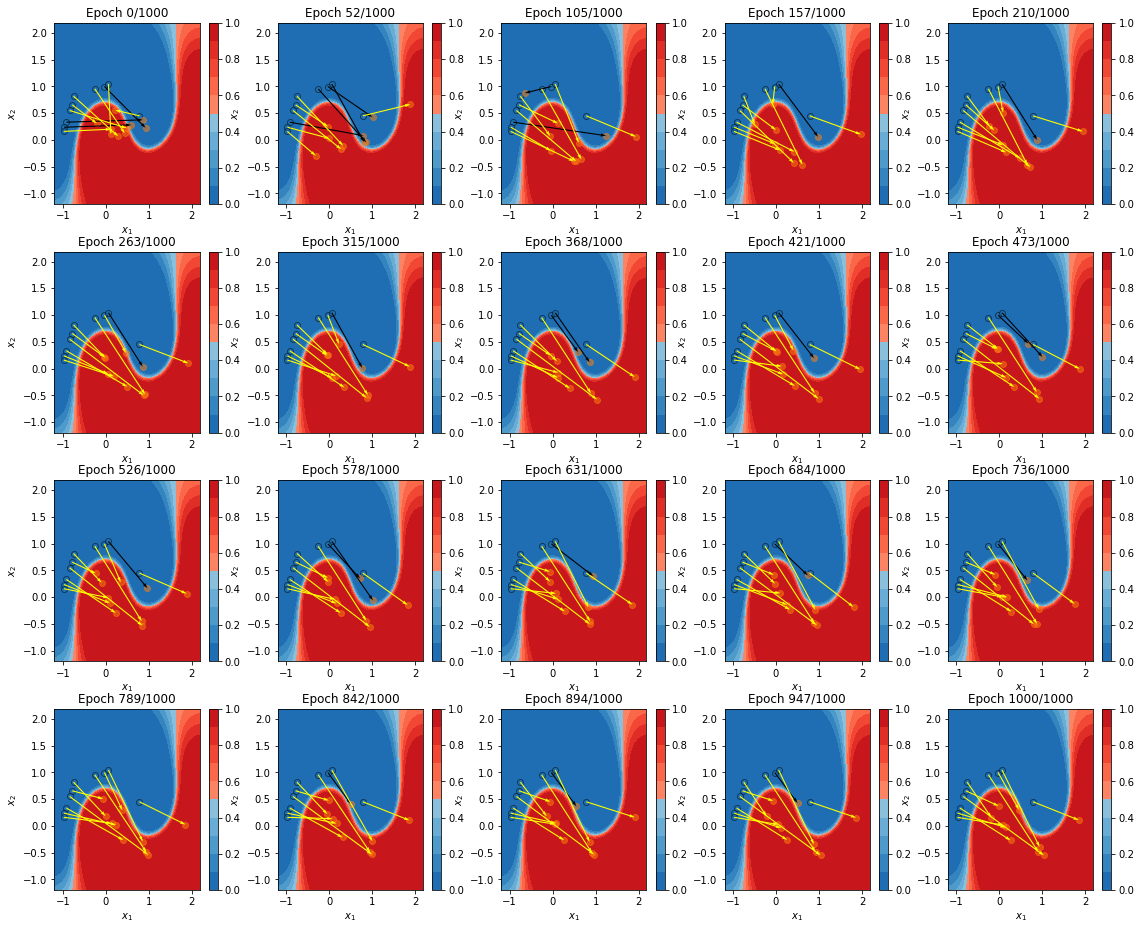

  0%|          | 0/1000 [00:00<?, ?it/s]

()

In [58]:
tgcf_only_gen_class_smaller_1norm_num_loss = TabGANcf(df_syn_moon, classifier=classifier_syn_moon_modified,
               activation_function="gelu", only_gen_class=1, query_critic_instance=False,
               jit_compile=False, generator_1norm_num_loss_coef=0.5, adam_beta1=0)
tgcf_only_gen_class_smaller_1norm_num_loss.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

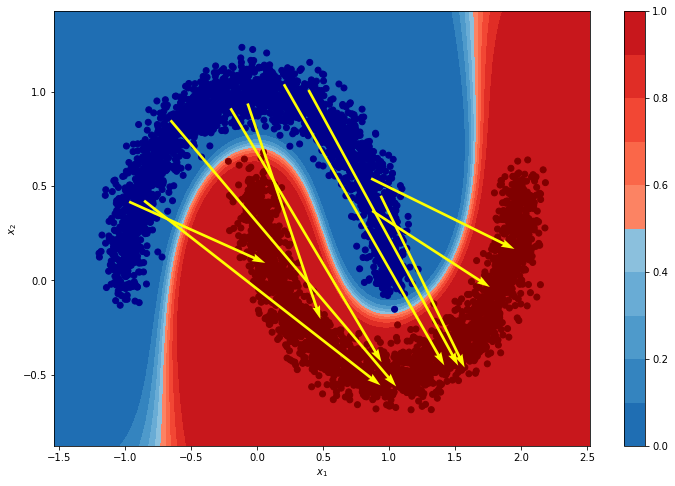

In [98]:
tgcf_only_gen_class_smaller_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_smaller_1norm_num_loss_run_1.pdf",
)

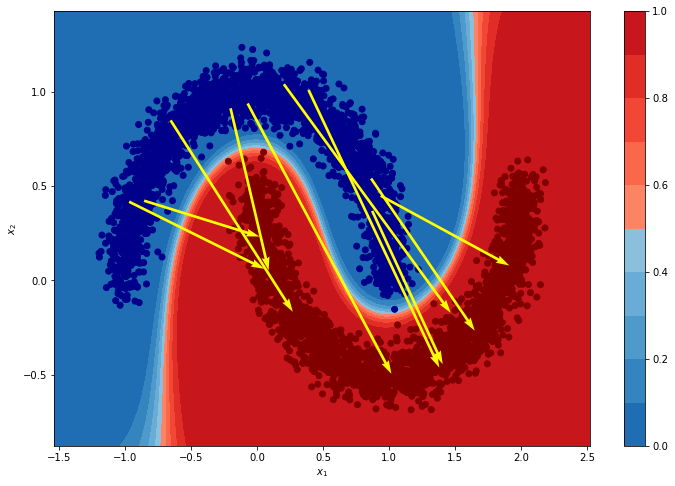

In [60]:
tgcf_only_gen_class_smaller_1norm_num_loss.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_smaller_1norm_num_loss_run2.pdf"
)

[]


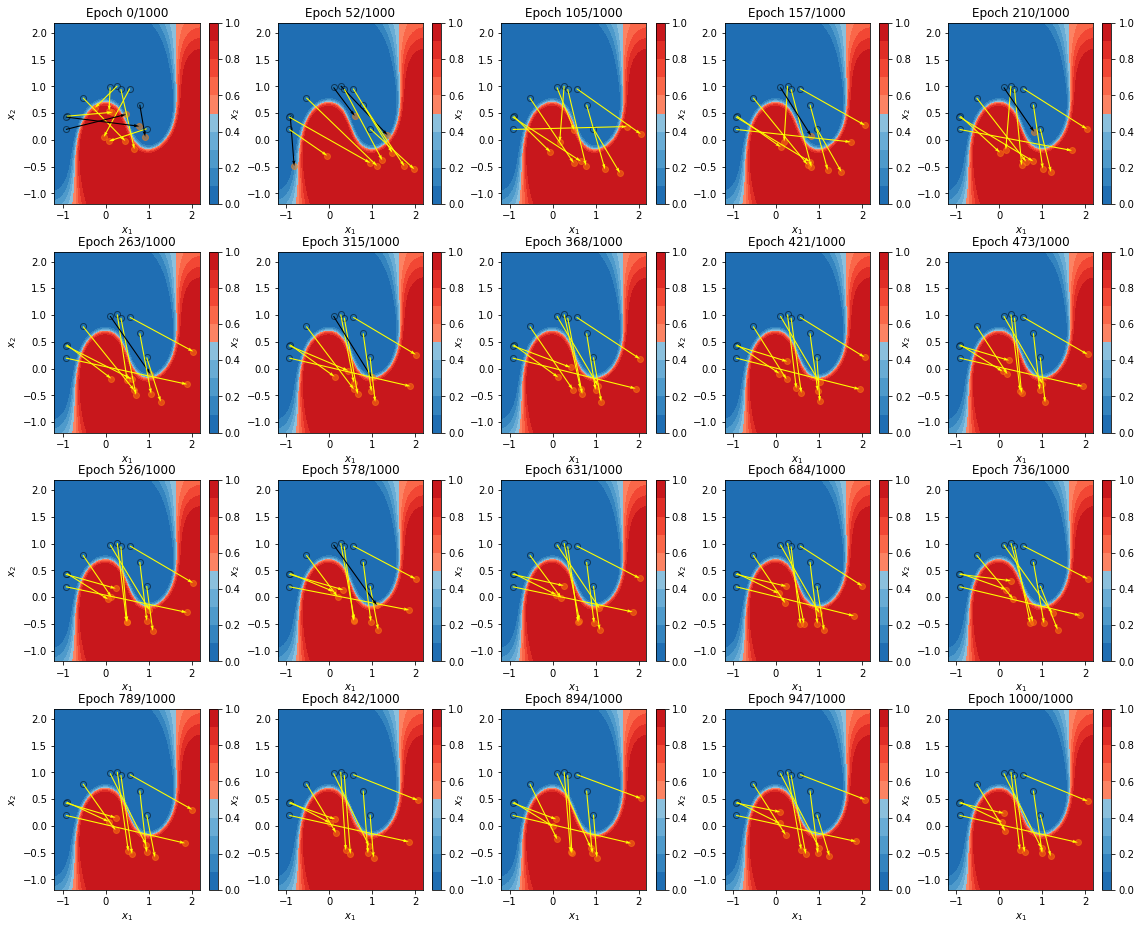

  0%|          | 0/1000 [00:00<?, ?it/s]

()

In [61]:
tgcf_only_gen_class_add_extra_correct_samples = TabGANcf(
    df_syn_moon, classifier=classifier_syn_moon_modified, activation_function="gelu", adam_beta1=0,
    only_gen_class=1,
    query_critic_instance=False,
    generator_1norm_num_loss_coef=1,
    critic_loss_mix_real_correct_samples_with_generated=True,
    critic_loss_mix_real_correct_samples_with_generated_coef=1
)
tgcf_only_gen_class_add_extra_correct_samples.train(1000, progress_bar=True, plot2D_image_real_time=True, plot2D_n_test=10)

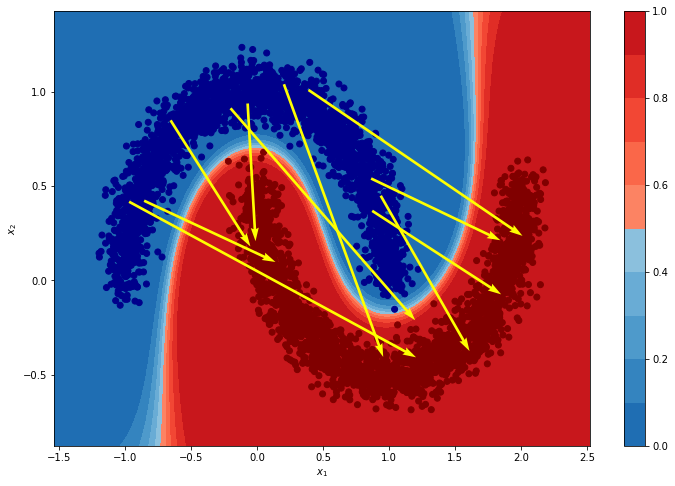

In [125]:
tgcf_only_gen_class_add_extra_correct_samples.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_add_extra_correct_samples_run_1.pdf",
)

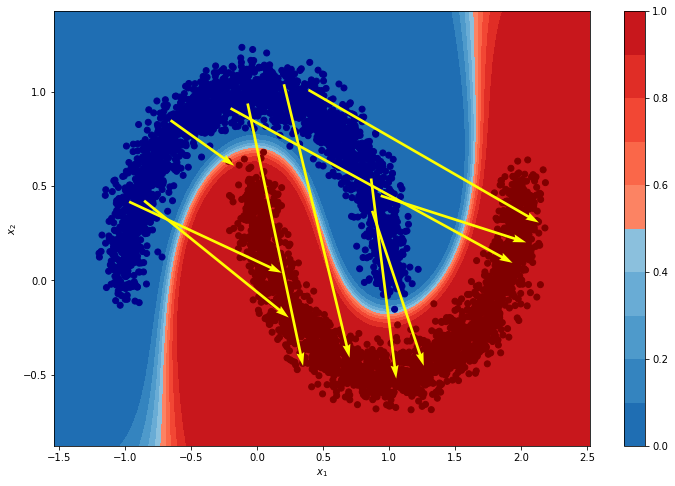

In [118]:
tgcf_only_gen_class_add_extra_correct_samples.plot2D_classifier(
    ["x1", "x2"], add_observations=True, add_counterfactuals=True,counterfactual_queries=counterfactual_queries,
    n_counterfactuals=N_COUNTERFACTUALS,
    save_dir=const.dir.images(), save_path="Syn_Moon_cf_explanations_only_gen_class_add_extra_correct_samples_run2.pdf"
)

In [162]:
df_adult = pd.read_csv(os.path.join(const.dir.data_comparison(), "adult_edited.csv"))
df_adult = df_adult.astype({col: "category" for col, dtype in zip(df_adult.columns, df_adult.dtypes) if dtype == "object"})

In [163]:
df_adult

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Government,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,US,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,US,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,US,<=50K
3,53,Private,234721,<=12th,7,Married,Handlers-cleaners,Black,Male,0,0,40,US,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Non-US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,White,Male,0,0,40,US,<=50K
45218,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,0,0,36,US,<=50K
45219,38,Private,374983,Bachelors,13,Married,Prof-specialty,White,Male,0,0,50,US,<=50K
45220,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,US,<=50K


In [176]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

def extract_numeric_and_discrete_columns(X):
    columns_discrete_bool = [str(b) in ["object", "category"] for b in X.dtypes]
    discrete_columns_of_X = X.columns[columns_discrete_bool]
    numeric_columns_of_X = X.columns[np.logical_not(columns_discrete_bool)]
    return numeric_columns_of_X, discrete_columns_of_X
X_adult = df_adult.drop("income", axis=1)

# numeric_columns_adult, discrete_columns_adult = extract_numeric_and_discrete_columns(X_adult)
# oh_encoder = OneHotEncoder(categories="auto", sparse=False)
# X_adult_preprocessed = np.concatenate((X_adult[numeric_columns_adult].to_numpy(),
#                           oh_encoder.fit_transform(X_adult[discrete_columns_adult])),
#                          axis=1)
Y_adult = np.where(df_adult["income"] == "<=50K", 0, 1)
mod_adult = XGBClassifier(
    tree_method="gpu_hist", enable_categorical=True, eval_metric="logloss"
)
mod_adult.fit(X_adult, Y_adult)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric='logloss', gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [177]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_adult, mod_adult.predict(X_adult)))

0.895449117686082


In [235]:
def classifier_adult(data):
    data = data.astype({col: "category" for col, dtype in zip(data.columns, data.dtypes) if dtype == "object"})
    if "income" in data.columns:
        data = data.drop("income", axis=1)
    return mod_adult.predict_proba(data)[:,1]

In [236]:
classifier_adult(df_adult.drop("income", axis=1))

array([0.00130291, 0.20969027, 0.01222179, ..., 0.82164335, 0.01069855,
       0.7889403 ], dtype=float32)

In [241]:
dict_tabGAN = {
        "batch_size": 500,
        "n_critic":10,
        "pac":1,
        "optimizer":"adam",
        "opt_lr":0.0002,
        "qtr_spread":1,
        "adam_beta1":0.7,
        "adam_beta2":0.999,
        "qtr_lbound_apply":0.05,
        "wgan_lambda":10,
        "quantile_transformation_int":True,
        "quantile_rand_transformation":True,
        "noise_discrete_unif_max": 0.01,
        "gumbel_temperature": 0.5,
        "activation_function": "gelu",
        "max_quantile_share":1,
        "n_quantiles_int":1000,
        "qt_n_subsample":1e5,
        "dim_hidden":256,
        "dim_latent":128,
        "batch_normalization_generator":True,
        "batch_normalization_before_activation":False,
        "generator_concatenate_hidden_with_previous_layer":False,
        "layer_normalization_critic":False,
        "layer_normalization_simple_type":False,
        "layer_normalization_before_activation":False,
        "qt_distribution":"normal",
        "latent_distribution":"normal",
        "oh_encoding_activation_function":"gumbel"
}

In [242]:
tgcf = TabGANcf(df_adult.drop("income", axis=1), classifier=classifier_adult,
                only_gen_class=1, query_critic_instance=False, **dict_tabGAN,
               jit_compile=True)
tgcf.train(300, progress_bar=True)

[]


  0%|          | 0/300 [00:00<?, ?it/s]

()

In [250]:
print(np.sum(np.where(classifier_adult(df_adult) > 0.5, 1, 0)))
np.sum(np.where(classifier_adult(tgcf.sample()) > 0.5, 1, 0))

9570


12602

In [247]:
queries = tgcf.generate_queries(5)
queries[0]
tgcf.inv_data_transform(*tgcf.split_transformed_data(queries[0]))

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,28.0,Private,287267.998874,Some-college,10.0,Never-married,Other-service,White,Male,0.0,0.0,35.0,US
1,31.0,Private,271162.003244,<=12th,7.0,Never-married,Exec-managerial,White,Male,0.0,0.0,40.0,US
2,29.0,Private,406661.995921,HS-grad,9.0,Never-married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US
3,46.0,Private,184883.000250,<=12th,5.0,Married,Machine-op-inspct,White,Female,0.0,0.0,40.0,US
4,48.0,Private,238567.000594,<=12th,3.0,Married,Handlers-cleaners,White,Male,0.0,0.0,40.0,Non-US


In [248]:
samples = tgcf.sample(queries=queries)
samples["pred"] = classifier_adult(samples)
samples

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,pred
0,42.0,Private,258022.078125,Some-college,10.000000,Never-married,Other-service,White,Male,0.0,0.0,40.0,US,0.390376
1,42.0,Private,262105.625000,<=12th,13.000000,Never-married,Exec-managerial,White,Male,0.0,0.0,40.0,US,0.127305
2,42.0,Private,335970.281250,HS-grad,10.000000,Never-married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.464157
3,46.0,Private,180407.000000,<=12th,13.000000,Married,Machine-op-inspct,White,Female,0.0,0.0,40.0,US,0.015550
4,49.0,Private,229656.312500,<=12th,12.647531,Married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.066920


In [251]:
tgcf_mix_in_wrong_observations = TabGANcf(df_adult.drop("income", axis=1), classifier=classifier_adult,
                only_gen_class=1, query_critic_instance=False, **dict_tabGAN,
                                          critic_loss_mix_real_wrong_samples_with_generated=True,
               jit_compile=True)
tgcf_mix_in_wrong_observations.train(300, progress_bar=True)

[]


  0%|          | 0/300 [00:00<?, ?it/s]

()

In [252]:
print(np.sum(np.where(classifier_adult(df_adult) > 0.5, 1, 0)))
np.sum(np.where(classifier_adult(tgcf_mix_in_wrong_observations.sample()) > 0.5, 1, 0))

9570


14070

In [248]:
samples = tgcf_mix_in_wrong_observations.sample(queries=queries)
samples["pred"] = classifier_adult(samples)
samples

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,pred
0,42.0,Private,258022.078125,Some-college,10.000000,Never-married,Other-service,White,Male,0.0,0.0,40.0,US,0.390376
1,42.0,Private,262105.625000,<=12th,13.000000,Never-married,Exec-managerial,White,Male,0.0,0.0,40.0,US,0.127305
2,42.0,Private,335970.281250,HS-grad,10.000000,Never-married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.464157
3,46.0,Private,180407.000000,<=12th,13.000000,Married,Machine-op-inspct,White,Female,0.0,0.0,40.0,US,0.015550
4,49.0,Private,229656.312500,<=12th,12.647531,Married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.066920


In [255]:
tgcf_mix_in_more_wrong_observations = TabGANcf(df_adult.drop("income", axis=1), classifier=classifier_adult,
                only_gen_class=1, query_critic_instance=False, **dict_tabGAN,
                                          critic_loss_mix_real_wrong_samples_with_generated=True,
                                               critic_loss_mix_real_wrong_samples_with_generated_coef=1,
               jit_compile=True)
tgcf_mix_in_more_wrong_observations.train(300, progress_bar=True)

[]


  0%|          | 0/300 [00:00<?, ?it/s]

()

In [256]:
print(np.sum(np.where(classifier_adult(df_adult) > 0.5, 1, 0)))
np.sum(np.where(classifier_adult(tgcf_mix_in_more_wrong_observations.sample()) > 0.5, 1, 0))

9570


6365

In [248]:
samples = tgcf_mix_in_more_wrong_observations.sample(queries=queries)
samples["pred"] = classifier_adult(samples)
samples

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,pred
0,42.0,Private,258022.078125,Some-college,10.000000,Never-married,Other-service,White,Male,0.0,0.0,40.0,US,0.390376
1,42.0,Private,262105.625000,<=12th,13.000000,Never-married,Exec-managerial,White,Male,0.0,0.0,40.0,US,0.127305
2,42.0,Private,335970.281250,HS-grad,10.000000,Never-married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.464157
3,46.0,Private,180407.000000,<=12th,13.000000,Married,Machine-op-inspct,White,Female,0.0,0.0,40.0,US,0.015550
4,49.0,Private,229656.312500,<=12th,12.647531,Married,Handlers-cleaners,White,Male,0.0,0.0,40.0,US,0.066920
